In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.model_selection import cross_val_score,KFold

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Opening the files in the given path
root_path = '/content/drive/MyDrive/fake-news'
directory = os.fsencode(root_path)
for file in os.listdir(root_path) :
  new_path=os.path.join(root_path, file)
  print(new_path)

/content/drive/MyDrive/fake-news/submit.csv
/content/drive/MyDrive/fake-news/test.csv
/content/drive/MyDrive/fake-news/train.csv


In [ ]:
#Reading the dataset
data=pd.read_csv("/content/drive/MyDrive/fake-news/train.csv")
data=data.drop(columns=['id','title','author'])
data=data.dropna()
data1=data.copy()
data1.reset_index(inplace=True)
data1.head()

,index,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,Ever get the feeling your life circles the rou...,0
2,2,"Why the Truth Might Get You Fired October 29, ...",1
3,3,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#Preprocessing(Includes removing punctuation,tokenisation,removing stopwords and Stemming)
ps = PorterStemmer()
corpus = []
for i in range(0, len(data1)):
    review = re.sub('[^a-zA-Z0-9]', ' ', data1['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
#Vectorisation of data using Tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = tfidf.fit_transform(corpus).toarray()

In [ ]:
y=data1.iloc[:,-1]
print(len(y))

In [ ]:
print(len(corpus),len(corpus[0]))

In [ ]:
print(len(X),len(X[0]))

In [ ]:
#Dividing the data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
kf=KFold(n_splits=5)

In [ ]:
#Function for making the confusion matrix
import matplotlib.pyplot as plt

import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Implementing Naive Bayes
from sklearn import metrics
import numpy as np
from sklearn.naive_bayes import MultinomialNB
def NaiveBayes() :
  classifier=MultinomialNB()
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  score_MNB = metrics.accuracy_score(y_test, pred)
  print("accuracy:   %0.3f" % score_MNB)
  score_cross_validation=cross_val_score(classifier,X_train,y_train,cv=kf)
  print("Cross Validation Score:{}" .format(score_cross_validation))
  print("Average Cross Validation score :{}".format(score_cross_validation.mean()))
  cm = metrics.confusion_matrix(y_test, pred)
  plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
#Implementing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
def RandomForest() :
  clf=RandomForestClassifier(n_estimators=10) 
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  score_RF=metrics.accuracy_score(y_test,y_pred)
  print("Accuracy: %0.3f" %score_RF)
  score_cross_validation=cross_val_score(clf,X_train,y_train,cv=kf)
  print("Cross Validation Score:{}" .format(score_cross_validation))
  print("Average Cross Validation score :{}".format(score_cross_validation.mean()))
  cm = metrics.confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
#Implementing Gradient Boost classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
def GradientBoost():
  gb_clf=GradientBoostingClassifier(n_estimators=10,random_state=14128)
  gb_clf.fit(X_train,y_train)
  y_pred=gb_clf.predict(X_test)
  score_GB=gb_clf.score(X_train,y_train)
  print("Accuracy: %0.3f" %score_GB)
  score_cross_validation=cross_val_score(gb_clf,X_train,y_train,cv=kf)
  print("Cross Validation Score:{}" .format(score_cross_validation))
  print("Average Cross Validation score :{}".format(score_cross_validation.mean()))
  cm = metrics.confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


In [ ]:
#Implementing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
def DecisionTree():
  clf = DecisionTreeClassifier(max_depth=5)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  score_DT=metrics.accuracy_score(y_test, y_pred)
  print("Accuracy: %0.3f" %score_DT)
  score_cross_validation=cross_val_score(clf,X_train,y_train,cv=kf)
  print("Cross Validation Score:{}" .format(score_cross_validation))
  print("Average Cross Validation score :{}".format(score_cross_validation.mean()))
  cm = metrics.confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
#Implementing Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
def Logistic():
  classifier = LogisticRegression(C=100000)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  score_LR=metrics.accuracy_score(y_test,y_pred)
  print("Accuracy: %0.3f" %score_LR)
  score_cross_validation=cross_val_score(classifier,X_train,y_train,cv=kf)
  print("Cross Validation Score:{}" .format(score_cross_validation))
  print("Average Cross Validation score :{}".format(score_cross_validation.mean()))
  cm = metrics.confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
#Implementing Support Vector Classifier
from sklearn.svm import SVC
from sklearn import metrics
def SVC1():
  svclassifier = SVC(kernel='linear',C=0.25)
  svclassifier.fit(X_train, y_train)
  y_pred = svclassifier.predict(X_test)
  score_SVM=metrics.accuracy_score(y_test,y_pred)
  print("Accuracy: %0.3f" %score_SVM)
  score_cross_validation=cross_val_score(svclassifier,X_train,y_train,cv=kf)
  print("Cross Validation Score:{}" .format(score_cross_validation))
  print("Average Cross Validation score :{}".format(score_cross_validation.mean()))
  cm = metrics.confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Accuracy: 0.951
Cross Validation Score:[0.94220846 0.94530444 0.94803854 0.94872677 0.94872677]
Average Cross Validation score :0.946600997047495
Confusion matrix, without normalization


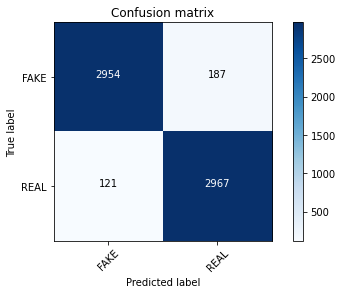

In [ ]:
SVC1()

accuracy:   0.908
Cross Validation Score:[0.89920881 0.90368077 0.9119064  0.90123882 0.91121817]
Average Cross Validation score :0.9054505925962228
Confusion matrix, without normalization


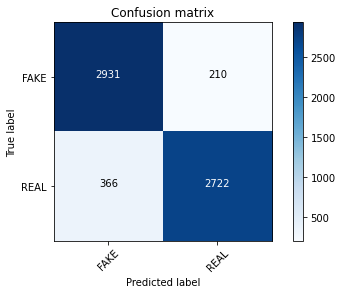

In [ ]:
NaiveBayes()

Accuracy: 0.906
Cross Validation Score:[0.89680083 0.89611283 0.89848589 0.89917412 0.88059188]
Average Cross Validation score :0.8942331098653344
Confusion matrix, without normalization


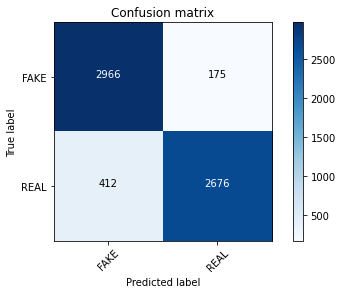

In [ ]:
RandomForest()

Accuracy: 0.877
Cross Validation Score:[0.86687307 0.87272102 0.88059188 0.87818307 0.86476256]
Average Cross Validation score :0.872626318370045
Confusion matrix, without normalization


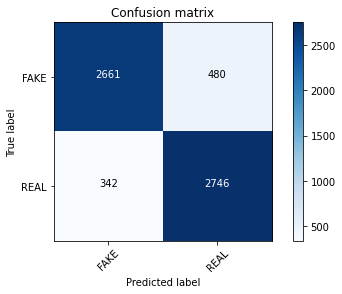

In [ ]:
GradientBoost()

Accuracy: 0.862
Cross Validation Score:[0.86962504 0.86480908 0.86682725 0.87749484 0.85615967]
Average Cross Validation score :0.8669831772797986
Confusion matrix, without normalization


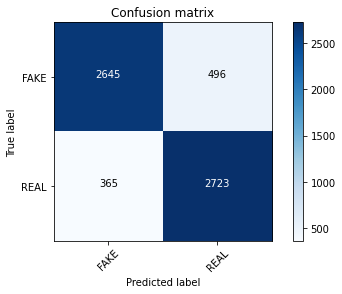

In [ ]:
DecisionTree()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.947


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross Validation Score:[0.94736842 0.94220846 0.94666208 0.94287681 0.94597385]
Average Cross Validation score :0.9450179231325956
Confusion matrix, without normalization


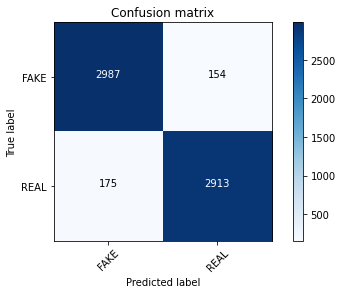

In [ ]:
Logistic()